In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
tsla = yf.Ticker("TSLA")
tsla_data = tsla.history(period="2y")

In [6]:
dates = np.arange(len(tsla_data)), (len(tsla_data), 1)
prices = tsla_data["Close"].values

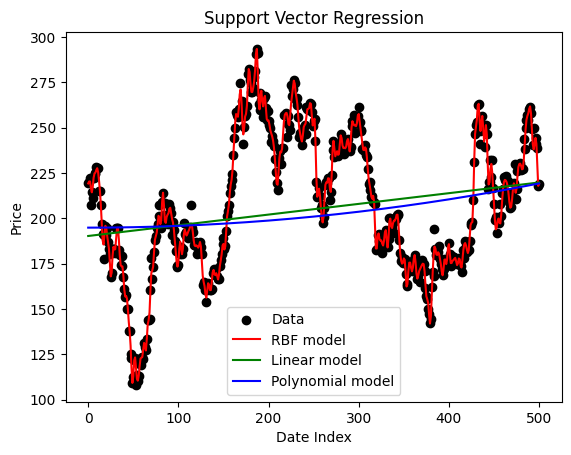

In [18]:
dates = np.reshape(dates, (len(dates), 1))
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
                  
svr_lin.fit(dates, prices)
svr_poly.fit(dates, prices)
svr_rbf.fit(dates, prices)

plt.scatter(dates, prices, color='black', label='Data')
plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial model')
plt.xlabel('Date Index')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()


In [19]:
# Get the last date index in the dataset
last_date_index = len(tsla_data) - 1  # Last index in the dataset
tomorrow_index = last_date_index + 1  # Index for tomorrow

# Use the RBF model to predict tomorrow's price
predicted_tomorrow_price = svr_rbf.predict([[tomorrow_index]])[0]

print(f"The predicted price for tomorrow is: {predicted_tomorrow_price}")

The predicted price for tomorrow is: 231.54478364028242


In [20]:
print(tsla_data.tail())

                                 Open        High         Low       Close  \
Date                                                                        
2024-10-08 00:00:00-04:00  243.559998  246.210007  240.559998  244.500000   
2024-10-09 00:00:00-04:00  243.820007  247.429993  239.509995  241.050003   
2024-10-10 00:00:00-04:00  241.809998  242.789993  232.339996  238.770004   
2024-10-11 00:00:00-04:00  220.130005  223.339996  214.380005  217.800003   
2024-10-14 00:00:00-04:00  220.130005  221.910004  213.740005  219.160004   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-10-08 00:00:00-04:00   56303200        0.0           0.0  
2024-10-09 00:00:00-04:00   66289500        0.0           0.0  
2024-10-10 00:00:00-04:00   83087100        0.0           0.0  
2024-10-11 00:00:00-04:00  142628900        0.0           0.0  
2024-10-14 00:00:00-04:00   86117900        0.0           0.0  
